In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("dataset.csv", encoding="latin1")
df
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [22]:
df.shape

(51290, 24)

In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [43]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [33]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [36]:
df.duplicated().any()

np.False_

**Hypothesis 1: Technology products have the highest profit margin compared to other product categories.**




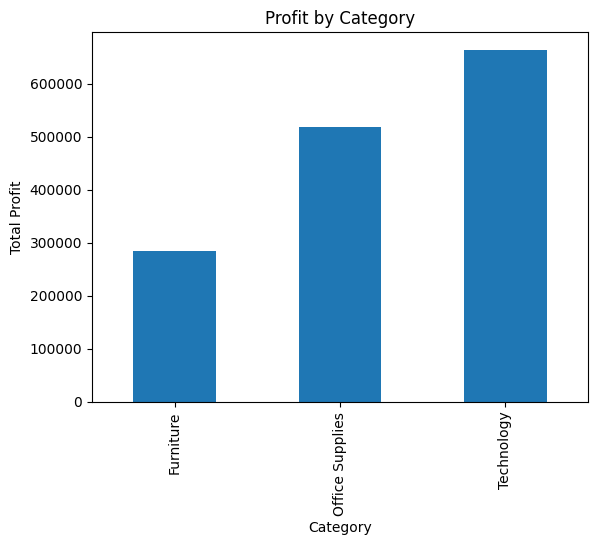

In [42]:
cat_profit=df.groupby('Category')['Profit'].sum()
cat_profit
cat_profit.plot(kind='bar')
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()

Hypothesis 1 is correct

**Hypothesis 2: The East region has the highest sales compared to other regions.**

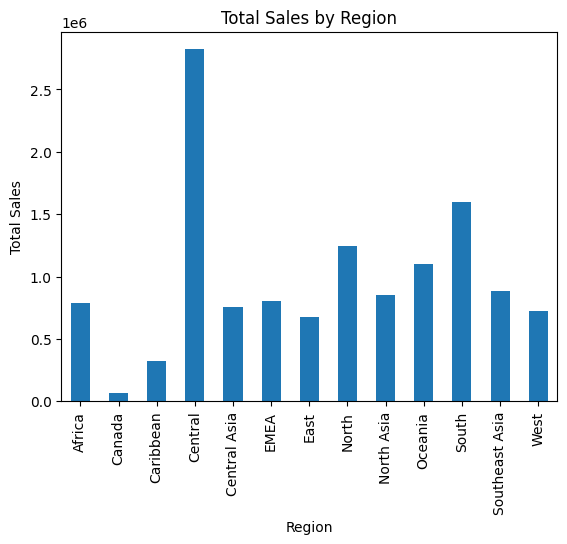

In [48]:
region_sale=df.groupby('Region')['Sales'].sum()
pd.options.display.float_format = '{:,.2f}'.format   # 2 decimals with commas
region_sale


region_sale.plot(kind="bar")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

 The hypothesis is not supported as the central region has the highest sales.

**Hypothesis 3: Sales are higher during certain months of the year.**

In [50]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

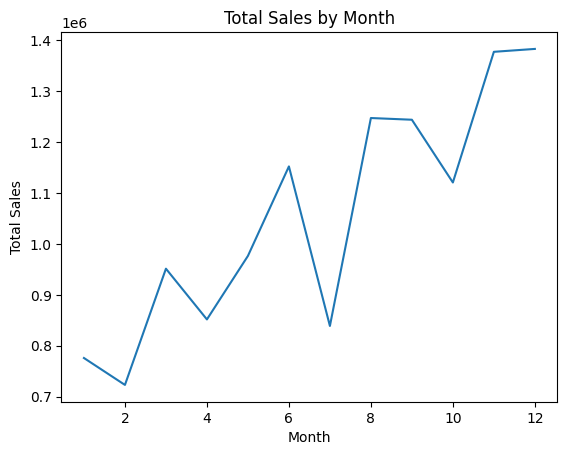

In [56]:
df['Order Month']=pd.DatetimeIndex(df['Order Date']).month
df['Order Month'] # extracted month from order date
month_sales=df.groupby('Order Month')['Sales'].sum()
month_sales.plot(kind='line')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Our Hypothesis is supported as sales are higher during certain months of the year.

**Hypothesis 4: Orders with same-day shipping have the lowest rate of returned products.**


In [67]:
df['Ship Mode']
total_orders_by_shipping_mode=df.groupby('Ship Mode').size()

total_orders_by_shipping_mode


,0
Ship Mode,
First Class,7505
Same Day,2701
Second Class,10309
Standard Class,30775


Ship Mode
First Class      25.08
Same Day         23.92
Second Class     24.08
Standard Class   24.48
dtype: float64


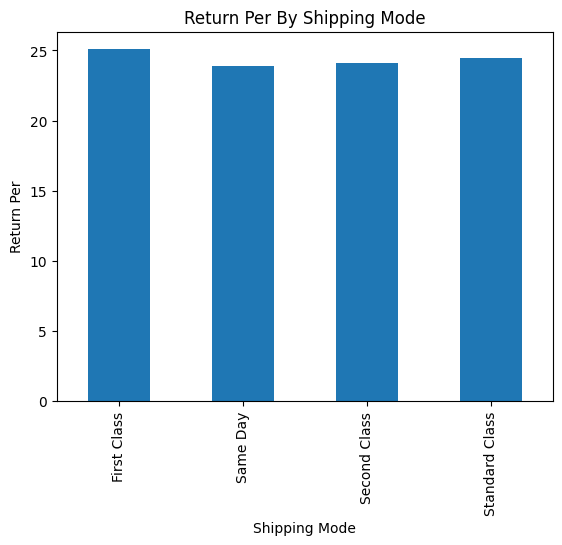

In [57]:
returned_orders_by_shipping_mode=df[df['Profit']<0].groupby('Ship Mode').size()

returned_per_by_shipping_mode=(returned_orders_by_shipping_mode/total_orders_by_shipping_mode)*100
print(returned_per_by_shipping_mode)
returned_per_by_shipping_mode.plot(kind="bar")
plt.title("Return Per By Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Return Per")
plt.show()
# Conclusion: The hypothesis is supported as orders with same-day
# shipping have the lowest rate of returned products.

**Hypothesis 5: The company's profit is more on weekdays than on weekends.**



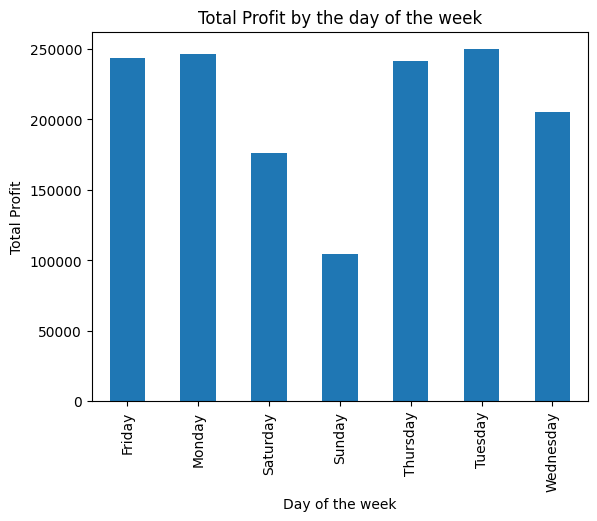

In [68]:
df['Order Day']=pd.DatetimeIndex(df['Order Date']).day_name() # extract day from date

day_profit=df.groupby('Order Day')['Profit'].sum()
day_profit.plot(kind="bar")
plt.title("Total Profit by the day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Total Profit")
plt.show()
# conclusion: The hypothesis is supported as company's profit
# is higher on weekdays compared to weekends.
